# Exercise 12

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

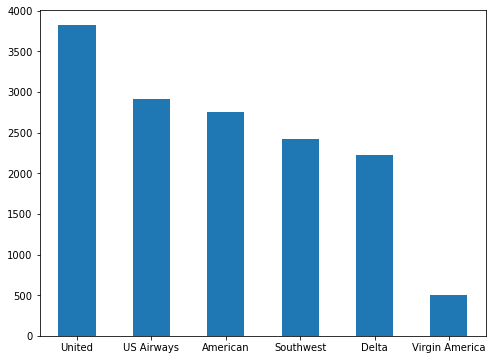

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

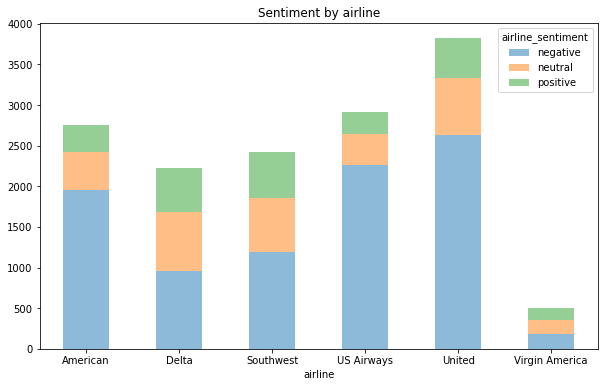

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 12.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [9]:
vect = CountVectorizer(lowercase=False)
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 17964)

In [10]:
RDC = RandomForestClassifier()
pd.Series(cross_val_score(RDC, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.727186
std       0.026512
min       0.693989
25%       0.705772
50%       0.723702
75%       0.738730
max       0.773907
dtype: float64

# Exercise 12.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [11]:
vect2 = CountVectorizer(stop_words='english', lowercase=False)
X_dtm2 = vect2.fit_transform(X)
X_dtm2.shape

(14640, 17688)

In [12]:
RDC2 = RandomForestClassifier()
pd.Series(cross_val_score(RDC2, X_dtm2, y, cv=10)).describe()

count    10.000000
mean      0.713046
std       0.049723
min       0.617486
25%       0.698429
50%       0.709016
75%       0.733948
max       0.808060
dtype: float64

# Exercise 12.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

### Without

In [13]:
vect_ng_wo = CountVectorizer(ngram_range=(1, 2), min_df=2)
X_dtm_ng_wo = vect_ng_wo.fit_transform(X)
X_dtm_ng_wo.shape

(14640, 31146)

In [14]:
RDC_ng_wo = RandomForestClassifier()
pd.Series(cross_val_score(RDC_ng_wo, X_dtm_ng_wo, y, cv=10)).describe()

count    10.000000
mean      0.731967
std       0.026933
min       0.700820
25%       0.712261
50%       0.729508
75%       0.741120
max       0.781421
dtype: float64

In [15]:
print(vect_ng_wo.get_stop_words())

None


### With

In [16]:
vect_ng_w = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)
X_dtm_ng_w = vect_ng_w.fit_transform(X)
X_dtm_ng_w.shape

(14640, 18448)

In [17]:
RDC_ng_w = RandomForestClassifier()
pd.Series(cross_val_score(RDC_ng_w, X_dtm_ng_w, y, cv=10)).describe()

count    10.000000
mean      0.714344
std       0.049117
min       0.616120
25%       0.704918
50%       0.709699
75%       0.738217
max       0.798497
dtype: float64

In [18]:
print(vect_ng_w.get_stop_words())

frozenset({'these', 'am', 'found', 'hundred', 'why', 'whom', 'another', 'whenever', 'between', 'yourself', 'could', 'well', 'us', 'is', 'therein', 'get', 'below', 'who', 'itself', 'behind', 'due', 'afterwards', 'over', 'me', 'de', 'alone', 'about', 'cant', 'whereupon', 'sixty', 'least', 'any', 'without', 'no', 'except', 'thereupon', 'yourselves', 'someone', 'him', 'everything', 'nowhere', 'became', 'never', 'we', 'side', 'on', 'again', 'nothing', 'enough', 'whither', 'should', 'everyone', 'may', 'hence', 'sometimes', 'thin', 'across', 'interest', 'un', 'during', 'wherever', 'beside', 'such', 'there', 'keep', 'your', 'along', 'sincere', 'though', 'otherwise', 'nobody', 'ltd', 'two', 'sometime', 'hereafter', 'find', 'co', 'whatever', 'often', 'you', 'although', 'something', 'further', 'myself', 'toward', 'are', 'after', 'what', 'anyone', 'please', 'has', 'our', 'be', 'how', 'by', 'themselves', 'being', 'them', 'inc', 'take', 'ten', 'mine', 'anywhere', 'within', 'forty', 'whether', 'whoev

# Exercise 12.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

### Single TFIDF

In [19]:
vect_tfidf = TfidfVectorizer()
X_dtm_tfidf = vect_tfidf.fit_transform(X)
X_dtm_tfidf.shape

(14640, 15051)

In [20]:
RDC_tfidf= RandomForestClassifier()
pd.Series(cross_val_score(RDC_tfidf, X_dtm_tfidf, y, cv=10)).describe()

count    10.000000
mean      0.721790
std       0.024440
min       0.692623
25%       0.699966
50%       0.722678
75%       0.734290
max       0.760929
dtype: float64

### TFID with Stopwords

In [21]:
vect_tfidf_sw = TfidfVectorizer(stop_words='english')
X_dtm_tfidf_sw = vect_tfidf_sw.fit_transform(X)
X_dtm_tfidf_sw.shape

(14640, 14770)

In [22]:
RDC_tfidf_sw= RandomForestClassifier()
pd.Series(cross_val_score(RDC_tfidf_sw, X_dtm_tfidf_sw, y, cv=10)).describe()

count    10.000000
mean      0.707992
std       0.042058
min       0.608607
25%       0.692111
50%       0.721311
75%       0.726264
max       0.765710
dtype: float64

### TFIDF with ngram_range

In [23]:
vect_tfidf_ngr = TfidfVectorizer(ngram_range=(1, 5))
X_dtm_tfidf_ngr = vect_tfidf_sw.fit_transform(X)
X_dtm_tfidf_ngr.shape

(14640, 14770)

In [24]:
RDC_tfidf_ngr= RandomForestClassifier()
pd.Series(cross_val_score(RDC_tfidf_ngr, X_dtm_tfidf_ngr, y, cv=10)).describe()

count    10.000000
mean      0.708538
std       0.043281
min       0.607240
25%       0.689720
50%       0.720287
75%       0.733607
max       0.764344
dtype: float64

### TFIDF Complete

In [25]:
vect_tfidf_f = TfidfVectorizer(ngram_range=(1, 5), stop_words='english', min_df=5)
X_dtm_tfidf_f = vect_tfidf_f.fit_transform(X)
X_dtm_tfidf_f.shape

(14640, 5227)

In [26]:
RDC_tfidf_f = RandomForestClassifier()
pd.Series(cross_val_score(RDC_tfidf_f, X_dtm_tfidf_f, y, cv=10)).describe()

count    10.000000
mean      0.702459
std       0.042259
min       0.591530
25%       0.706626
50%       0.715164
75%       0.720287
max       0.744536
dtype: float64